In [382]:
import numpy as np
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
from CoolProp.Plots.SimpleCycles import StateContainer, StatePoint
import CoolProp
from CoolProp.Plots import PropertyPlot
from CoolProp.CoolProp import PropsSI
from CoolProp.CoolProp import PhaseSI
plt.rc('text', usetex=True)
import pandas as pd
warnings.filterwarnings('ignore')

In [385]:

p1 = 32e5
T1 = 575

p2= 1e5

p3=.1e5
T3 = 425

p4=.2e5
T3 = 425

pressures = np.geomspace(.1e5, 30e5, 100)
temperatures = np.linspace(273.15, 700,1000)
entropy = np.linspace(-500., 2000., 300)

inletentropy = PropsSI("S", "P", p1, "T", T1, 'Toluene')
outletentropy = PropsSI("S", "P", p3, "T", T3, 'Toluene')

stator_inlet = PropsSI("T", "P", p1, "S", entropy, 'Toluene')
stator_outlet = PropsSI("T", "P", p2, "S", entropy, 'Toluene')
rotor_outlet = PropsSI("T", "P", p3, "S", entropy, 'Toluene')
condenser_inlet = PropsSI("T", "P", p4, "S", entropy, 'Toluene')


criticalisobar = PropsSI("T", "P", CP.PropsSI("Pcrit","Toluene"), "S", entropy, 'Toluene')

test = PropsSI("S", "T",temperatures , "Q", 1., 'Toluene')
test2 = PropsSI("S", "T",temperatures , "Q", 0., 'Toluene')

In [321]:
dftemp = pd.DataFrame(temperatures, columns=['T'])
#fpres = pd.DataFrame(pressures, columns=['P'])
dfentr = pd.DataFrame(entropy, columns=['S'])
dftemp['key']=1
#fpres['key']=1
dfentr['key']=1
df = dftemp.merge(dfentr, how='outer')[['S','T']]
df['Z'] = df.apply(lambda x: PropsSI('Z','T',x['T'],'S',x['S'],'Toluene'), axis=1)
df['phase'] = df.apply(lambda x: PropsSI('Phase','T',x['T'],'S',x['S'],'Toluene'), axis=1)

In [322]:
gas = df['phase'] == CP.get_phase_index('phase_gas')
supercritical_gas = df['phase'] == CP.get_phase_index('phase_supercritical_gas')
df_filter = df[gas | supercritical_gas]
df_filter = df_filter[['T',"S","Z"]]
hdfpivot = df_filter.pivot('T','S')
X=hdfpivot.columns.levels[1].values
Y=hdfpivot.index.values
Z=hdfpivot.values
Xi,Yi = np.meshgrid(X, Y)


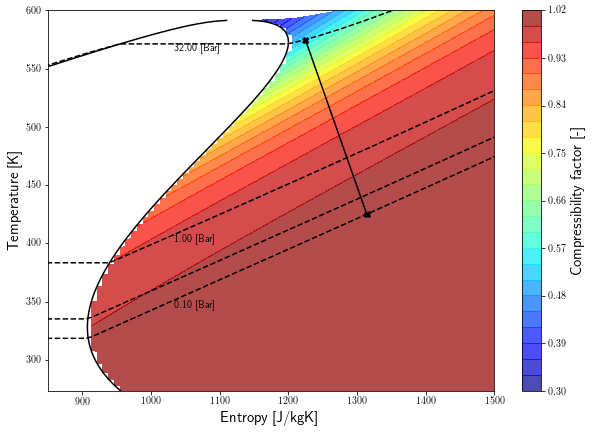

In [394]:
fig, ax = plt.subplots(figsize=(10,7))
#fig,ax = plt.subplots()

ax.plot(entropy, stator_inlet,color='black', linestyle='--')
ax.plot(entropy, rotor_outlet,color='black', linestyle='--')
ax.plot(entropy, stator_outlet,color='black', linestyle='--')
ax.plot(entropy, condenser_inlet,color='black', linestyle='--')


#ax.plot()
ax.plot(test,temperatures, color='black')
ax.plot(test2, temperatures,color='black')
ax.plot([inletentropy,outletentropy], [T1,T3],color='black', marker="X")
# ax.plot(, T3,color='black', marker="X")
fig.text(0.3, 0.29, "{:4.2f}".format(p3/1e5)+' [Bar]')
fig.text(0.3, 0.42, "{:4.2f}".format(p2/1e5)+' [Bar]')
fig.text(0.3, 0.80, "{:4.2f}".format(p1/1e5)+' [Bar]')
#ax.plot(entropy, criticalisobar, color='black')
fig = ax.contourf(Xi, Yi, Z,25, alpha=0.7, cmap=plt.cm.jet);
ax.set_xlim([850,1500])
ax.ticklabel_format(fontsize=20)
ax.set_ylim([273.15,600])
ax.set_xlabel(r'Entropy [J/kgK]', fontsize=15)
ax.set_ylabel(r'Temperature [K]', fontsize=15)
cb = plt.colorbar(fig)
cb.set_label(r"Compressibility factor [-]", fontsize=15)

In [143]:
type(plot)

CoolProp.Plots.Plots.PropertyPlot

In [102]:
pressures = np.geomspace(.1e5, 30e5, 100)
temperatures = np.linspace(200, 700, 100)
entropy = np.linspace(1400., 3000., 100)

X, Y = np.meshgrid(entropy, temperatures)


In [103]:
dftemp = pd.DataFrame(temperatures, columns=['T'])
dfpres = pd.DataFrame(pressures, columns=['P'])
dfentr = pd.DataFrame(entropy, columns=['S'])

dftemp['key']=1
dfpres['key']=1
dfentr['key']=1
df = dftemp.merge(dfentr, how='outer')[['S','T']]
df['Z'] = df.apply(lambda x: PropsSI('Z','T',x['T'],'S',x['S'],'Toluene'), axis=1)

In [176]:
X=hdfpivot.columns.levels[1].values
Y=hdfpivot.index.values
Z=hdfpivot.values
Xi,Yi = np.meshgrid(X, Y)
ax.contourf(Xi, Yi, Z,25, alpha=0.7, cmap=plt.cm.jet);
#plt.colorbar()
